In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = sio.loadmat('sample_west.mat')
wt_data = data['t_data']
w_data = data['y_data']
wt_ans = data['t_ans']
w_ans = data['y_ans']
sm.tsa.adfuller(w_data)
w_pi = []
n = len(w_data)
m = int(n/10)
for i in range(10):
    data = w_data[:m]
    w = ARIMA(data, order=[2,0,0])
    w_fit = w.fit()
    wvalue = w_fit.arparams
    w_pi.append(wvalue)
    w_data = w_data[m:]

In [3]:
data = sio.loadmat('sample_east.mat')
et_data = data['t_data']
e_data = data['y_data']
et_ans = data['t_ans']
e_ans = data['y_ans']
e_pi = []
n = len(e_data)
m = int(n/10)
for i in range(10):
    data = e_data[:m]
    e = ARIMA(data, order=[2,0,0])
    e_fit = e.fit()
    evalue = e_fit.arparams
    e_pi.append(evalue)
    e_data = e_data[m:]

In [4]:
data = sio.loadmat('sample_texas.mat')
tt_data = data['t_data']
t_data = data['y_data']
tt_ans = data['t_ans']
t_ans = data['y_ans']
t_pi = []
n = len(t_data)
m = int(n/10)
for i in range(10):
    data = t_data[:m]
    t = ARIMA(data, order=[2,0,0])
    t_fit = t.fit()
    tvalue = t_fit.arparams
    t_pi.append(tvalue)
    t_data = t_data[m:]

In [5]:
print(w_pi)
print(e_pi)
print(t_pi)

[array([0.65245171, 0.27602271]), array([0.6468858 , 0.29336142]), array([0.66966589, 0.2706828 ]), array([0.66706702, 0.27027508]), array([0.66659033, 0.27347988]), array([0.67313809, 0.26370656]), array([0.66641527, 0.27835975]), array([0.67453863, 0.26698486]), array([0.63767828, 0.28745964]), array([0.66751121, 0.26976413])]
[array([0.89116995, 0.02173629]), array([0.87255807, 0.03092572]), array([0.86883835, 0.04247704]), array([0.86555747, 0.01984319]), array([ 0.88888397, -0.00154175]), array([0.88413863, 0.03540314]), array([0.89528214, 0.00519456]), array([0.8795946 , 0.03050491]), array([0.82714214, 0.00632589]), array([0.80956088, 0.09889243])]
[array([0.71177517, 0.15148279]), array([0.73108736, 0.13205758]), array([0.68220502, 0.15259861]), array([0.72281172, 0.147254  ]), array([0.68245864, 0.17228918]), array([0.70259849, 0.15604031]), array([0.72062571, 0.15916085]), array([0.74720494, 0.14856044]), array([0.72557413, 0.13887358]), array([0.72660771, 0.13550597])]


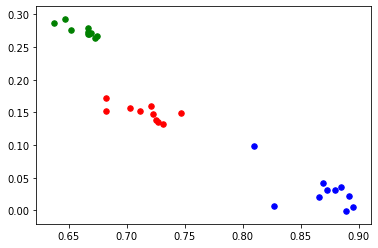

In [6]:
for i in range(10):
    plt.scatter(w_pi[i][0],y = w_pi[i][1], s = 30, c = 'g')
    plt.scatter(e_pi[i][0],y = e_pi[i][1], s = 30, c = 'b')
    plt.scatter(t_pi[i][0],y = t_pi[i][1], s = 30, c = 'r')

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [40]:
x_wpi = []
y_wpi = []
x_epi = []
y_epi = []
x_tpi = []
y_tpi = []
for i in range(10):
    x_wpi.append(w_pi[i][0])
    y_wpi.append(w_pi[i][1])
    x_epi.append(e_pi[i][0])
    y_epi.append(e_pi[i][1])
    x_tpi.append(t_pi[i][0])
    y_tpi.append(t_pi[i][1])
x_wpi = np.array(x_wpi)
y_wpi = np.array(y_wpi)
x_epi = np.array(x_epi)
y_epi = np.array(y_epi)
x_tpi = np.array(x_tpi)
y_tpi = np.array(y_tpi)

[-0.66397747]


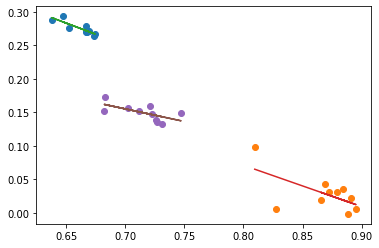

In [64]:
linew = LinearRegression()
linew.fit(x_wpi.reshape(-1,1), y_wpi)
#print(linew.predict(np.array([0.65]).reshape(-1,1)))
print(linew.coef_)
plt.plot(x_wpi.reshape(-1,1), y_wpi,'o')
plt.plot(x_epi.reshape(-1,1), y_epi,'o')
plt.plot(x_wpi.reshape(-1,1),linew.predict(x_wpi.reshape(-1,1)))
plt.plot(x_epi,linee.predict(x_epi.reshape(-1,1)))
plt.plot(x_tpi.reshape(-1,1), y_tpi,'o')
plt.plot(x_tpi,linet.predict(x_tpi.reshape(-1,1)))
plt.show()

[-0.61610119]


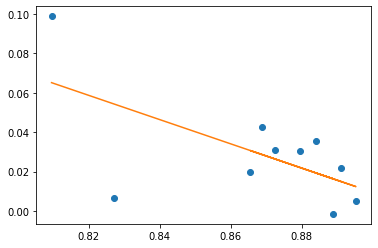

In [31]:
linee = LinearRegression()
linee.fit(x_epi.reshape(-1,1), y_epi)
print(linee.coef_)
plt.plot(x_epi.reshape(-1,1), y_epi,'o')
plt.plot(x_epi,linee.predict(x_epi.reshape(-1,1)))
plt.show()

[-0.37611025]


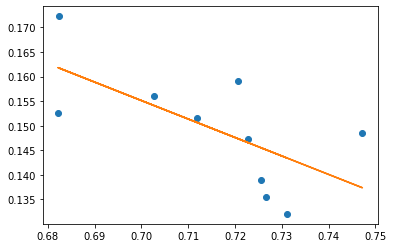

In [32]:
linet = LinearRegression()
linet.fit(x_tpi.reshape(-1,1), y_tpi)
print(linet.coef_)
plt.plot(x_tpi.reshape(-1,1), y_tpi,'o')
plt.plot(x_tpi,linet.predict(x_tpi.reshape(-1,1)))
plt.show()

# Support Vector Machine (supervised)

In [106]:
from sklearn import svm

w = np.array(w_pi)
e = np.array(e_pi)
t = np.array(t_pi)
value = np.concatenate((w,e,t), axis=0)
#print(value)
#print(value.shape)
y1 = [0 for i in range(10)]
y2 = [1 for i in range(10)]
y3 = [2 for i in range(10)]
Y = y1+y2+y3

In [211]:
model = svm.SVC(kernel='linear', C= 3.0, gamma = 0.5)
model.fit(value,Y)
#print(model.predict(np.array([0.74, 0.135]).reshape(1,-1)))

SVC(C=3.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
print(model.coef_, model.intercept_)
print(model.coef_[0,0] / model.intercept_[0])

[[-3.85381018  4.75458635]
 [-1.59301994  3.76882059]
 [ 4.58933195 -3.61218561]] [ 2.24475233  0.2959055  -3.2998361 ]
-1.716808632590396


In [213]:
co1 = model.coef_[0]
co2 = model.coef_[1]
co3 = model.coef_[2]
a1 = -co1[0] / co1[1]
a2 = -co2[0] / co2[1]
a3 = -co3[0] / co3[1]
#print(a1)

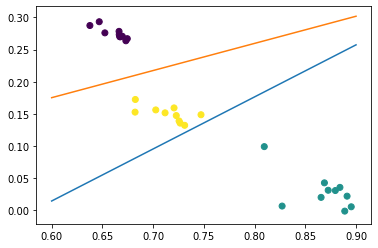

In [214]:
xx = np.linspace(0.6,0.9)
yy1 = a1 * xx - model.intercept_[0] / co1[1]
yy2 = a2 * xx - model.intercept_[1] / co2[1]
#yy3 = a3 * xx - model.intercept_[2] / co3[1]
h1 = plt.plot(xx, yy1)
h2 = plt.plot(xx, yy2)
#h3 = plt.plot(xx, yy3)
plt.scatter(value[:,0], value[:, 1], c = Y)
#ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=50)
plt.show()